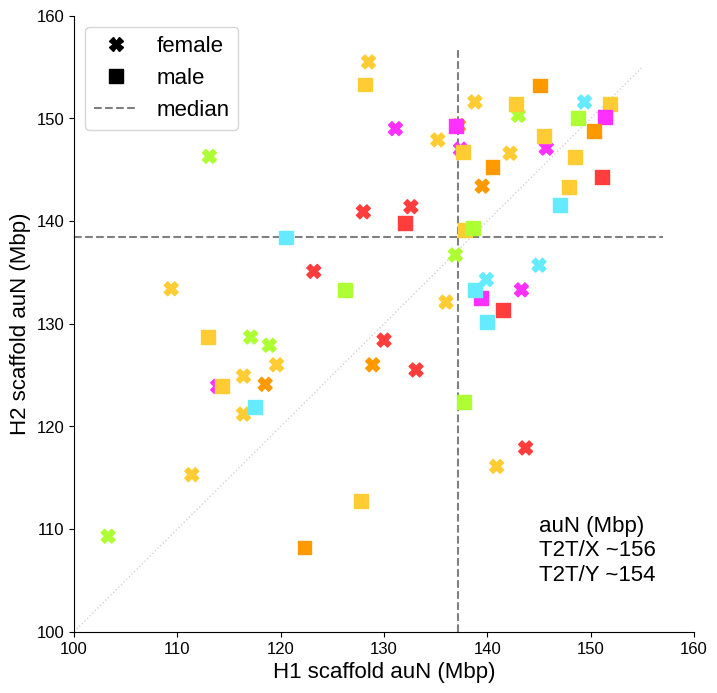

In [8]:
%run -n "../../00_project_config.ipynb"
%run -n "../../05_plot_config.ipynb"
%run -n "../../10_assm_stats.ipynb"

_MYNAME="input-read-summary"
_MYSTAMP=get_nb_stamp(_MYNAME)

_MY_OUT_PATH = PLOT_OUT_MAIN_FIG1.joinpath("panels")

import numpy as np
import matplotlib.pyplot as plt

def plot_hap_vs_hap():
    
    female_x = [ASSM_STATS.get_stat(s, ("hap1", "aun"), 1e6) for s in HGSVC_FEMALES]
    female_y = [ASSM_STATS.get_stat(s, ("hap2", "aun"), 1e6) for s in HGSVC_FEMALES]
    female_colors = [get_super_color(sample) for sample in HGSVC_FEMALES]
    
    median_fx = sorted(female_x)[HGSVC_FEMALE//2]
    median_fy = sorted(female_y)[HGSVC_FEMALE//2]
    
    male_x = [ASSM_STATS.get_stat(s, ("hap1", "aun"), 1e6) for s in HGSVC_MALES]
    male_y = [ASSM_STATS.get_stat(s, ("hap2", "aun"), 1e6) for s in HGSVC_MALES]
    male_colors = [get_super_color(sample) for sample in HGSVC_MALES]
    
    median_mx = sorted(male_x)[HGSVC_MALE//2]
    median_my = sorted(male_y)[HGSVC_MALE//2]

    median_all_x = sorted(male_x + female_x)[HGSVC_TOTAL//2]
    median_all_y = sorted(male_y + female_y)[HGSVC_TOTAL//2]
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    ax.scatter(
        female_x,
        female_y,
        c=female_colors,
        label="female",
        marker=FEMALE_MARKER
    )
    
    #ax.axhline(median_fy, 0, 0.95, zorder=0, color="grey", ls="dashed")
    #ax.axvline(median_fx, 0, 0.95, zorder=0, color="grey", ls="dashed")
    ax.axhline(median_all_y, 0, 0.95, zorder=0, color="grey", ls="dashed")
    ax.axvline(median_all_x, 0, 0.95, zorder=0, color="grey", ls="dashed")
    
    ax.scatter(
        male_x,
        male_y,
        c=male_colors,
        label="male",
        marker=MALE_MARKER
    )
    
    ax.set_xlabel("H1 scaffold auN (Mbp)")
    ax.set_ylabel("H2 scaffold auN (Mbp)")
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    ax.set_xlim(100, 160)
    ax.set_ylim(100, 160)
    
    handles = get_line_legend(
        [
            {
                "marker": FEMALE_MARKER,
                "label": "female",
                "linestyle": "",
                "color": "black"
            },
            {
                "marker": MALE_MARKER,
                "label": "male",
                "linestyle": "",
                "color": "black"
            },
            {
                "linestyle": "dashed",
                "label": "median",
                "color": "grey"
            }
        ]
    )
    
    ax.legend(handles=handles, loc="best")
    
    ax.text(
        145, 105,
        "auN (Mbp)\nT2T/X ~156\nT2T/Y ~154",
        {"fontsize": 16}
    )

    ax.plot(
        [100,155], [100,155],
        lw=1, ls="dotted",
        color="lightgrey", zorder=0
    )
    
    return fig, ax


def plot_unassigned_stats():
    
    female_x = [ASSM_STATS.get_stat(s, ("unassigned", "length"), 1e6) for s in HGSVC_FEMALES]
    female_y = [ASSM_STATS.get_stat(s, ("unassigned", "aun"), 1e6) for s in HGSVC_FEMALES]
    female_colors = [get_pop_color(sample) for sample in HGSVC_FEMALES]
    
    median_fx = sorted(female_x)[HGSVC_FEMALE//2]
    median_fy = sorted(female_y)[HGSVC_FEMALE//2]
    
    male_x = [ASSM_STATS.get_stat(s, ("unassigned", "length"), 1e6) for s in HGSVC_MALES]
    male_y = [ASSM_STATS.get_stat(s, ("unassigned", "aun"), 1e6) for s in HGSVC_MALES]
    male_colors = [get_pop_color(sample) for sample in HGSVC_MALES]
    
    median_mx = sorted(male_x)[HGSVC_MALE//2]
    median_my = sorted(male_y)[HGSVC_MALE//2]
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.scatter(
        female_x,
        female_y,
        c=female_colors,
        label="female",
        marker=FEMALE_MARKER
    )
       
    ax.scatter(
        male_x,
        male_y,
        c=male_colors,
        label="male",
        marker=MALE_MARKER
    )
    
    ax.set_xlabel("Total unassigned sequence (Mbp)")
    ax.set_ylabel("Unassigned sequence auN (Mbp)")
   
    handles = get_line_legend(
        [
            {
                "marker": FEMALE_MARKER,
                "label": "female",
                "linestyle": "",
                "color": "black"
            },
            {
                "marker": MALE_MARKER,
                "label": "male",
                "linestyle": "",
                "color": "black"
            },
        ]
    )
    
    ax.legend(handles=handles, loc="best")
    
    return


def plot_unassigned_vs_read_stats(read_stat, label):
    
    all_x = []
    for sample in HGSVC_ALL:
        data_value = HGSVC_SAMPLES.loc[HGSVC_SAMPLES["sample"] == sample, read_stat].values[0]
        all_x.append(data_value)
    
    all_y = [ASSM_STATS.get_stat(s, ("unassigned", "length"), 1e6) for s in HGSVC_ALL]
    all_colors = [get_pop_color(sample) for sample in HGSVC_ALL]
    
    median_x = sorted(all_x)[HGSVC_TOTAL//2]
    median_y = sorted(all_y)[HGSVC_TOTAL//2]
       
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.scatter(
        all_x,
        all_y,
        c=all_colors,
        label="HGSVC3",
        marker=GENERIC_MARKER
    )
    
    ax.set_xlabel(f"Read statistic: {label}")
    ax.set_ylabel("Total unassigned sequence (Mbp)")
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    handles = get_line_legend(
        [
            {
                "marker": GENERIC_MARKER,
                "label": "HGSVC3",
                "linestyle": "",
                "color": "black"
            },
        ]
    )
    
    ax.legend(handles=handles, loc="best")
    
    return

    
figure, axes = plot_hap_vs_hap()

for ext in ["png", "pdf", "svg", "pck"]:
    out_path = _MY_OUT_PATH.joinpath(f"fig1_panel_scaffold-aun.{ext}")
    if ext == "pck":
        save_figure(out_path, axes)
    else:
        save_figure(out_path, figure)
        

#_ = plot_unassigned_stats()
#_ = plot_unassigned_vs_read_stats("ontul_cov", "ONT-UL cov. (x-fold)")
#_ = plot_unassigned_vs_read_stats("hifi_cov", "HiFi cov. (x-fold)")
#_ = plot_unassigned_vs_read_stats("ontul_n50", "ONT-UL N50 (kbp)")